# CAISO Data Fetcher
This notebook will us the pycaiso python library to collect forecasted caiso data

In [1]:
import os
if 'data' == os.getcwd().split('/')[-1]: os.chdir('..')
if 'ev_charging' == os.getcwd().split('/')[-1]: print('in the right place!')
else: os.chdir('/Users/varunvenkatesh/Documents/Github/ev_charging')
os.getcwd()

in the right place!


'/Users/varunvenkatesh/Documents/GitHub/ev_charging'

In [2]:
from datetime import datetime
import pandas as pd

# use Elizabeth's version
# from oasis import *
from src import oasis

dir(oasis)

['Any',
 'Atlas',
 'BadDateRangeError',
 'Dict',
 'List',
 'NoDataAvailableError',
 'Node',
 'Oasis',
 'Optional',
 'Response',
 'SystemDemand',
 'TypeVar',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'datetime',
 'get_lmps',
 'io',
 'pd',
 'pytz',
 're',
 'relativedelta',
 'requests',
 'time',
 'timedelta',
 'zipfile']

In [3]:
# example from documentation
# from pycaiso.oasis import Node
from src.oasis import Node
from datetime import datetime
import pandas as pd

# select pnode

cj = Node("CAPTJACK_5_N003")

# create dataframe with LMPS from arbitrary period (30 day maximum). 

cj_lmps = cj.get_lmps(datetime(2021, 1, 1), datetime(2021, 1, 2))

print(cj_lmps.head())

       INTERVALSTARTTIME_GMT        INTERVALENDTIME_GMT     OPR_DT  OPR_HR  \
0  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
1  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
2  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
3  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
4  2021-01-01T09:00:00-00:00  2021-01-01T10:00:00-00:00 2021-01-01       2   

   OPR_INTERVAL      NODE_ID_XML          NODE_ID             NODE  \
0             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
1             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
2             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
3             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
4             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   

  MARKET_RUN_ID LMP_TYPE XML_DATA_ITEM    PNODE_RESMRID GRP_TYPE  POS  \
0           DAM      LMP       LMP_PR

In [4]:
from src.oasis import SystemDemand
sd = SystemDemand()

In [5]:
df = sd.get_demand_forecast(start=datetime(2024, 3, 26), end=datetime(2024, 3, 27))

In [6]:
data_dict = {'INTERVALSTARTTIME_GMT':'the start of the forecast',
             'INTERVALENDTIME_GMT':'the end time of the forecast',
             'LOAD_TYPE':'no idea what this is',
             'OPR_DT':'date of the forecast',
             'OPR_HR':'operating hour',
             'OPR_INTERVAL':'some interval time',
             'MARKET_RUN_ID':'2DA = two day ahead, DAM= day ahead market, 7DA = seven day ahead forecast', 
             'TAC_AREA_NAME':'Transmission access charge. It is the area in california where the forecast occurs. PGE = Bay area, SCE = LA, SDGE = San Diego. From Claude - A transmission access charge (TAC) is a fee charged by transmission owners and operators, such as PG&E (Pacific Gas and Electric Company), to recover the costs associated with operating and maintaining their high-voltage transmission system.', 
             'LABEL':'same as Market Run ID',
             'XML_DATA_ITEM':'System forecast for the MARKET RUN ID, same as Market run id', 
             'POS':'no idea', 
             'MW':'Megawatts?', 
             'EXECUTION_TYPE':'Same as Market Run ID', 
             'GROUP':'subset of TAC? Should be some kind of region code'}
df

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,2024-03-26T17:00:00-00:00,2024-03-26T18:00:00-00:00,2,2024-03-26,11,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1397.26,2DA,1
1,2024-03-26T16:00:00-00:00,2024-03-26T17:00:00-00:00,2,2024-03-26,10,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1424.99,2DA,1
2,2024-03-26T19:00:00-00:00,2024-03-26T20:00:00-00:00,2,2024-03-26,13,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1355.18,2DA,1
3,2024-03-26T18:00:00-00:00,2024-03-26T19:00:00-00:00,2,2024-03-26,12,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1373.27,2DA,1
4,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,2,2024-03-26,5,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1101.59,2DA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,2024-03-27T05:30:00-00:00,2024-03-27T05:35:00-00:00,0,2024-03-26,23,7,RTM,WALCDSW,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.8,159.20,RTD,207
16724,2024-03-27T06:10:00-00:00,2024-03-27T06:15:00-00:00,0,2024-03-26,24,3,RTM,WALCDSW,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.8,148.86,RTD,207
16725,2024-03-27T06:20:00-00:00,2024-03-27T06:25:00-00:00,0,2024-03-26,24,5,RTM,WALCDSW,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.8,147.09,RTD,207
16726,2024-03-27T06:25:00-00:00,2024-03-27T06:30:00-00:00,0,2024-03-26,24,6,RTM,WALCDSW,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.8,146.65,RTD,207


<AxesSubplot: >

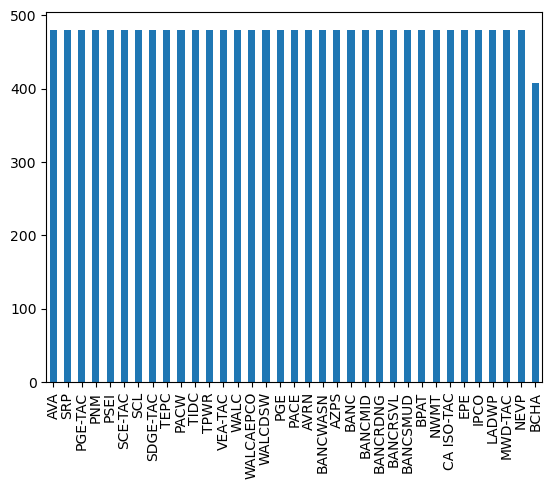

In [7]:
df['TAC_AREA_NAME'].value_counts().plot.bar()

In [8]:
siteid2tac = {2:'SCE-TAC', #caltech
              1:'SCE-TAC', #jpl
              19:'PGE-TAC', #office001
             }

In [9]:
df[df.TAC_AREA_NAME.isin(siteid2tac.values())]

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
480,2024-03-26T09:00:00-00:00,2024-03-26T10:00:00-00:00,2,2024-03-26,3,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,8741.08,2DA,21
481,2024-03-27T06:00:00-00:00,2024-03-27T07:00:00-00:00,2,2024-03-26,24,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,9677.26,2DA,21
482,2024-03-27T05:00:00-00:00,2024-03-27T06:00:00-00:00,2,2024-03-26,23,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,10290.16,2DA,21
483,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,2,2024-03-26,5,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,8952.27,2DA,21
484,2024-03-26T07:00:00-00:00,2024-03-26T08:00:00-00:00,2,2024-03-26,1,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,9237.96,2DA,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,2024-03-27T06:45:00-00:00,2024-03-27T06:50:00-00:00,0,2024-03-26,24,10,RTM,SCE-TAC,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.2,8661.77,RTD,187
12884,2024-03-26T07:00:00-00:00,2024-03-26T07:05:00-00:00,0,2024-03-26,1,1,RTM,SCE-TAC,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.2,8687.50,RTD,187
12885,2024-03-26T07:05:00-00:00,2024-03-26T07:10:00-00:00,0,2024-03-26,1,2,RTM,SCE-TAC,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.2,8656.62,RTD,187
12886,2024-03-26T07:45:00-00:00,2024-03-26T07:50:00-00:00,0,2024-03-26,1,10,RTM,SCE-TAC,RTM 5Min Load Forecast,SYS_FCST_5MIN_MW,5.2,8467.28,RTD,187


In [10]:
cols = ['OPR_DT', 'OPR_HR','TAC_AREA_NAME', 'MW']
df.loc[(df['MARKET_RUN_ID'] == '7DA') & (df['TAC_AREA_NAME'] == 'AVA') , cols].sort_values(by=['OPR_DT', 'OPR_HR'])

,OPR_DT,OPR_HR,TAC_AREA_NAME,MW
817,2024-03-26,1,AVA,1113.23
838,2024-03-26,2,AVA,1098.03
819,2024-03-26,3,AVA,1094.51
816,2024-03-26,4,AVA,1107.44
824,2024-03-26,5,AVA,1158.31
822,2024-03-26,6,AVA,1276.37
835,2024-03-26,7,AVA,1426.51
836,2024-03-26,8,AVA,1507.90
820,2024-03-26,9,AVA,1500.88
825,2024-03-26,10,AVA,1471.98


In [11]:
# SystemDemand().get_wind_and_solar_forecast()
df = sd.get_wind_and_solar_forecast(start=datetime(2024, 3, 26), end=datetime(2024, 3, 27))
df.columns

<Response [200]>


Index(['OPR_DT', 'OPR_HR', 'OPR_INTERVAL', 'INTERVALSTARTTIME_GMT',
       'INTERVALENDTIME_GMT', 'TRADING_HUB', 'RENEWABLE_TYPE', 'LABEL',
       'XML_DATA_ITEM', 'MARKET_RUN_ID_POS', 'RENEW_POS', 'MW',
       'MARKET_RUN_ID', 'GROUP'],
      dtype='object')

In [12]:
df.head()

,OPR_DT,OPR_HR,OPR_INTERVAL,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,TRADING_HUB,RENEWABLE_TYPE,LABEL,XML_DATA_ITEM,MARKET_RUN_ID_POS,RENEW_POS,MW,MARKET_RUN_ID,GROUP
0,2024-03-26,1,0,2024-03-26T07:00:00-00:00,2024-03-26T08:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
1,2024-03-26,2,0,2024-03-26T08:00:00-00:00,2024-03-26T09:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
2,2024-03-26,3,0,2024-03-26T09:00:00-00:00,2024-03-26T10:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
3,2024-03-26,4,0,2024-03-26T10:00:00-00:00,2024-03-26T11:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
4,2024-03-26,5,0,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1


In [14]:
df['INTERVALSTARTTIME_GMT'] = pd.to_datetime(df['INTERVALSTARTTIME_GMT'],
                                                                      utc=True)
df.head()

,OPR_DT,OPR_HR,OPR_INTERVAL,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,TRADING_HUB,RENEWABLE_TYPE,LABEL,XML_DATA_ITEM,MARKET_RUN_ID_POS,RENEW_POS,MW,MARKET_RUN_ID,GROUP
0,2024-03-26,1,0,2024-03-26 07:00:00+00:00,2024-03-26T08:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
1,2024-03-26,2,0,2024-03-26 08:00:00+00:00,2024-03-26T09:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
2,2024-03-26,3,0,2024-03-26 09:00:00+00:00,2024-03-26T10:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
3,2024-03-26,4,0,2024-03-26 10:00:00+00:00,2024-03-26T11:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
4,2024-03-26,5,0,2024-03-26 11:00:00+00:00,2024-03-26T12:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1


In [17]:
len(df)

144

In [20]:
start=datetime(2024, 3, 26)
end=datetime(2024, 3, 27)
daterange = pd.date_range(start, end, freq='H', tz=0)

In [21]:
df = df[df['INTERVALSTARTTIME_GMT'].isin(daterange)]
len(df)

108

# params used by pycaiso library
not needed, unless they are neeeded, ya know?

In [13]:
params: Dict[str, Any] = {
        "queryname": QUERY_MAPPING[market],
        "market_run_id": market,
        "startdatetime": oasis._get_UTC_string(start),
        "enddatetime": oasis._get_UTC_string(end),
        "version": 1,
        "node": node,
        "resultformat": 6,
    }

NameError: name 'QUERY_MAPPING' is not defined

# testing crap down below

In [ ]:
import datetime as dt
import urllib
d1 = dt.date(2024,3,20)
d2 = dt.date(2024,3,21) # dt.date.today()
days = [d1 + dt.timedelta(days=x) for x in range((d2-d1).days + 1)]
# specify url based on file types available
file_types = ['demand', 'netdemand', 'fuelsource', 'storage', 'co2', 'rtm_forecast']
url_format = "http://www.caiso.com/outlook/SP/History/%s/%s.csv"

In [ ]:
day = days[0]
file_type = 'demand'
url = url_format % (day.strftime("%Y%m%d"), file_type)
file = urllib.request.urlopen(url)
file

In [ ]:
pd.read_csv(file)

In [ ]:
"http://oasis.caiso.com/mrtu-oasis/SingleZip?queryname=AS_REQ&startdate=20061002&enddate=20061002&market_run_id=DAM&as_type=ALL&as_region=ALL"

In [ ]:
url_format = "http://oasis.caiso.com/mrtu-oasis/SingleZip?queryname=SLD_FCST&market_run_id=DAM&startdate=%s&enddate=%s"
url = url_format % (d1.strftime("%Y%m%d"), d2.strftime("%Y%m%d"))
print(url)
file = urllib.request.urlopen(url)
file

In [ ]:
http://oasis.caiso.com/oasisapi/SingleZip?

In [ ]:
url = "http://oasismap.caiso.com/oasisapi/SingleZip?queryname=AS_REQ&startdatetime=20240919T07:00-0000&enddatetime=20240920T07:00-0000&market_run_id=DAM&version=1&as_type=ALL&as_region=ALL"
file = urllib.request.urlopen(url)
file

In [ ]:
dir(file)
file.peek()

In [ ]:
!pip install pyiso

In [ ]:
from pyiso import CAISO